## Stats and Public Health Part ll

**Author: Darius Smith**

**BrainStation | Data Science | February 21, 2023**

### Table of Contents

[Purpose of Notebook](#Purpose-of-Notebook)

[Data Dictionary](#Data-Dictionary)

[Approach](#Approach)

[Basic Analysis](#Basic-Analysis)

[Statistical Analysis](#Statistical-Analysis)

[Advanced Statistical Analysis](#Advanced-Statistical-Analysis)

[Conclusion](#Conclusion)

## Purpose of Notebook

This notebook a continuation notebook to explore the relationship between the different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location. The data is from the Chicago database on West Nile Virus prevalence. 

As a refresher, introducing the data dictionary below for reference. 

## Data Dictionary  

Numerical Data:

- Year - Year that the WNV test is performed. (numerical)

- Week - Week that the WNV test is performed. (numerical)

- Date - Date and time that the WNV test is performed. (categorical)

Data About *Traps*: 

- Address Block - Address of the location of trap.(categorical)
- Trap - Id of the trap. (categorical)

- Trap type - Type of trap.(categorical)
- Mosquito # - Number of mosquitoes caught in this trap. (numerical)
- Block - Block number of address
- Latitude - Latitude of trap.(numerical)
- Longitude - Longitude of trap.(numerical)

Data About *Mosquitos*:

- Mosquito ID - Id for Mosquito species.(categorical)
- WNV Present - Whether West Nile Virus was present in these mosquitos.(categorical)
- Species - Mosquito species.(categorical)


Question of Interest: What is the probability of finding West Nile Virus (WNV) at any particular time and location?

## Approach

**Analysis**

- Import necessary libraries.
- Acquire the data.
- Inspect the Data.
- Clean the data if necessary.
- Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.
- Observe the average number of mosquitos for each month, and look for patterns/trends.

**Statistical Analysis**

- Summary Statistics.
- Interaction of the columns.
- Gain and understadning of:
    - Which columns are positively correlated with the number of mosquitoes caught? 
    - Which columns are negatively correlated? Are these correlations statistically significant?
- See if there is a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

**Advanced Statistical Analysis**

- Run a linear regression to determine how the independent variables affect the number of mosquitoes caught.
    - Model construction process.
    - Analyze model and results along with limitations.
- Run a logistic regression to determine how the independent variables affect West Nile Virus presence
    - Model construction process
    - Analyze model and results along with limitations.
    
**Conclusion**

- Summary of findings 


Beginning by importing the cleaned mosquito dataset to recall all variables. 

## Basic Analysis 

In [518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [519]:
mdf = pd.read_csv('downloads/mosquito_data_part_2 (1).csv')
mdf

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8


In [520]:
#Inspecting the data frame. 
mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [521]:
mdf.tail()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,positive,CULEX RESTUANS,41.977738,-87.880969,8


In [522]:
mdf.sample(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
5274,2014,39,14XX N HUMBOLDT DR,T033,GRAVID,2014-09-25 00:09:00,4,negative,CULEX PIPIENS,41.907285,-87.701395,9
12729,2009,20,70XX W ARMITAGE AVE,T151,GRAVID,2009-05-28 00:05:00,1,negative,CULEX RESTUANS,41.916135,-87.801093,5
8149,2012,39,91XX W HIGGINS RD,T009,GRAVID,2012-09-28 00:09:00,1,negative,CULEX PIPIENS,41.988586,-87.854473,9
15599,2012,33,45XX N CAMPBELL AVE,T220,GRAVID,2012-08-16 00:08:00,9,positive,CULEX RESTUANS,41.964414,-87.691363,8
8117,2012,39,51XX N MONT CLARE AVE,T223,GRAVID,2012-09-28 00:09:00,1,negative,CULEX PIPIENS,41.974523,-87.804589,9


In [523]:
# Determining how many columns and rows there are after first analysis. 

print(f'There are {mdf.shape[0]} rows of data and {mdf.shape[1]} columns')

There are 18495 rows of data and 12 columns


In [524]:
mdf.isna().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

In [525]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [526]:
# .duplicated() returns a true-false array if a row is a duplicate.
# checking is this dataset has duplicates.
mdf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18490    False
18491    False
18492    False
18493    False
18494     True
Length: 18495, dtype: bool

There are duplicates, moving forward to check the sum of duplicates and if there are any in the columns. 

In [527]:
# There are 658 duplicates rows.
mdf.duplicated().sum()

658

In [528]:
# None of the columns have duplicates. 
mdf.T.duplicated()

Year               False
Week               False
Address Block      False
Trap               False
Trap type          False
Date               False
Mosquito number    False
WNV Present        False
Species            False
Lat                False
Lon                False
Month              False
dtype: bool

In [529]:
# Looking to see if there are null values. 
mdf.isna().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

There are no null values, however, there were duplicates. Based on knowing from the previous analysis that the duplicates are due to the cap of mosquitos caught at (50), they will stay in the data and not be removed. Moving forward to exploring the WNV Present column. 

**WNV Present**

Moving forward with exploring the WNV present column. 

In [530]:
mdf['WNV Present'].unique()

array(['negative', 'positive'], dtype=object)

There are only two (2) values for this column, negative or positive. 

In [531]:
# Since there are only two values, these will be changed into a numerical Boolean. (1) or (0).
mdf['WNV Present'].value_counts()

negative    14501
positive     3994
Name: WNV Present, dtype: int64

In [532]:
# Seeing the percentages of positive to negative shows that there is an imbalance in the data of pos and neg.
mdf['WNV Present'].value_counts()/mdf.shape[0]*100

negative    78.404974
positive    21.595026
Name: WNV Present, dtype: float64

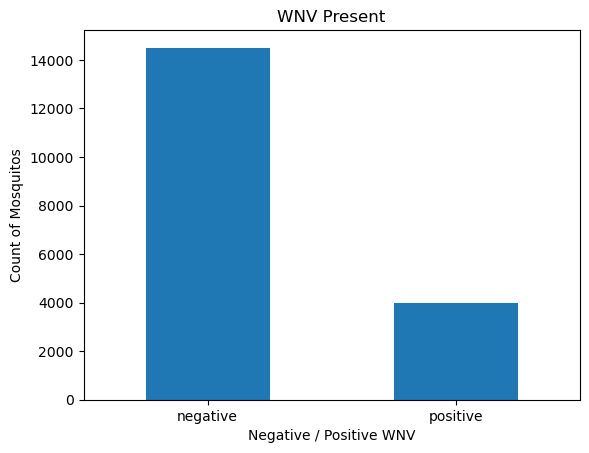

In [533]:
# plotting a visual to see comparison. 
mdf['WNV Present'].value_counts().plot(kind='bar')
plt.xlabel('Negative / Positive WNV')
plt.ylabel('Count of Mosquitos')
plt.title('WNV Present')
plt.xticks(rotation = 0)
plt.show()

There is a data imbalance as was mentioned previously. Now moving forward to change the **'WNV Present'** column into a binary column and creating dummy variables from the **Trap type** column. After this, an analysis/visual on average number of mosquitos for each month will be examined for trends. 

In [534]:
# converting WNV present into a binary column. 
mdf['WNV Present'] = np.where(mdf['WNV Present'] == 'positive',1, 0)

In [535]:
# Sanity check 
mdf['WNV Present'].value_counts()

0    14501
1     3994
Name: WNV Present, dtype: int64

In [536]:
# checking to see if the column had been changed. Sanity check 2.0
mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


In [537]:
mdf.tail()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,1,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,1,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,1,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,1,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,1,CULEX RESTUANS,41.977738,-87.880969,8


**'WNV Present'** has successfully been converted into a binary column. Next, creating dummy variables for the **'Trap type** column. 

The get_dummies function will be is used as it will convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1. This is important for modeling linear regression and logistic regression since they strictly require numeric input data.

In [538]:
pd.get_dummies(mdf['Trap type'])

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


Dummy variables have been created, moving forward with exploring the relationship between average number of mosquitos for each month, and seeing any trends that arise. First step, seeing the count of mosquitos by month. 

In [539]:
# Getting the count of mosquitos by month.
mdf['Month'].value_counts().sort_index()

5       42
6     2787
7     5108
8     6872
9     3461
10     225
Name: Month, dtype: int64

In [540]:
# Sum of the value counts of mosquitos. 
mdf['Month'].value_counts().sum()

18495

In [541]:
# using the .mean() to get the 
mdf['Month'].value_counts().mean()

3082.5

In [542]:
# the average number of mosquitos per month. 
mdf['Month'].value_counts().sort_index()/6

5        7.000000
6      464.500000
7      851.333333
8     1145.333333
9      576.833333
10      37.500000
Name: Month, dtype: float64

In [543]:
# average of mosquitos in trap.
mdf['Mosquito number'].mean()

10.879913490132468

In [544]:
# The average for every column grouped by month. 
mdf.groupby('Month').mean()

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/3929596976.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf.groupby('Month').mean()


,Year,Week,Mosquito number,WNV Present,Lat,Lon
Month,,,,,,
5,2008.238095,20.380952,2.761905,0.000000,41.824481,-87.685189
6,2013.708647,24.202009,10.264442,0.015788,41.854124,-87.712200
7,2013.032498,28.498825,11.551879,0.163469,41.854573,-87.714573
8,2012.739232,32.490541,12.111321,0.358411,41.851121,-87.712942
9,2012.707599,36.822595,8.394973,0.186362,41.853631,-87.711043
10,2009.093333,39.208889,5.377778,0.031111,41.823429,-87.692313


In [545]:
mdf.describe()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,0.215950,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.411491,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,0.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,0.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,0.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,0.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,1.000000,42.017801,-87.531051,10.000000


In this case it wasn't quite clear what 'number of mosquitos' meant. This could have meant the count of the total number of mosquitos per month or number of mosquitos caught in trap. In this instance, both have been calculated. 

For **total number of mosquitos per month**, May(5) averaged 7, June(6) averaged 464.5, July(7) averaged 851.3, August(8) averaged 1145.3, September(9) averaged 576.8, and October(10) averaged 37.5. The following was noticed: 

- Summer months by far has the highest average number of mosquitos especially in July and August.
- Both the beginning (May) and ending month (October) has the lowest average number of mosquitos. 
- It can be inferred that the watmer the weather the higher the average number of mosquitos. 
- 25th percentile is July.
- 50th and 75 percentile is July.

For **number of mosquitos(Mosquito number)**, May(5) averaged 2.76, June(6) averaged 10.3, July(7) averaged 11.6, August(8) averaged 12.1, September(9) averaged 8.4, and October(10) averaged 5.4. The following was noticed: 

- Summary months have the highest average per mosquitos caught. July and August have the highest.
- Both the beginning (May) and ending month (October) has the lowest average number of mosquitos caught.
- It can be inferred that the warmer the weather the higher the average number of mosquitos caught.

## Statistical Analysis

After basic analysis, now moving on to exploring statistical data. Specifically, is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus? Also, there will be a look at which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [546]:
#importing our stat libraries
from scipy import stats
from scipy.stats import norm

Now looking at descriptive statistics.

In [547]:
mdf['Species'].describe()

count              18495
unique                 4
top       CULEX RESTUANS
freq               11866
Name: Species, dtype: object

In [548]:
mdf['WNV Present'].describe()

count    18495.000000
mean         0.215950
std          0.411491
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: WNV Present, dtype: float64

In [549]:
# Using a groupby to get the agg for 'Species'
mdf.groupby('Species').agg(['mean', 'median', 'std', 'var', 'count'])

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/1081779304.py:2: FutureWarning: ['Address Block', 'Trap', 'Trap type', 'Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mdf.groupby('Species').agg(['mean', 'median', 'std', 'var', 'count'])


Year                                           Week  \
                         mean  median       std        var  count       mean   
Species                                                                        
CULEX PIPIENS     2010.911593  2011.0  3.217889  10.354808   5486  33.117207   
CULEX RESTUANS    2013.863475  2014.0  3.546558  12.578073  11866  29.982134   
CULEX SALINARIUS  2010.676991  2010.0  3.110856   9.677424    226  30.539823   
CULEX TERRITANS   2012.993457  2013.0  4.004904  16.039258    917  31.699019   

                                                     ...        Lon  \
                 median       std        var  count  ...       mean   
Species                                              ...              
CULEX PIPIENS      33.0  3.456558  11.947791   5486  ... -87.709392   
CULEX RESTUANS     30.0  4.334168  18.785016  11866  ... -87.716553   
CULEX SALINARIUS   30.0  3.820495  14.596185    226  ... -87.716251   
CULEX TERRITANS    32.0  4.430803  19.632019    917  ... -87.679969   

                                                           Month         \
                     median       std       var  count      mean median   
Species                                                                   
CULEX PIPIENS    -87.701395  0.096451  0.009303   5486  8.135436    8.0   
CULEX RESTUANS   -87.703107  0.094590  0.008947  11866  7.382774    7.0   
CULEX SALINARIUS -87.701788  0.107582  0.011574    226  7.535398    8.0   
CULEX TERRITANS  -87.679463  0.089496  0.008010    917  7.769902    8.0   

                                             
                       std       var  count  
Species                                      
CULEX PIPIENS     0.792671  0.628327   5486  
CULEX RESTUANS    0.991810  0.983686  11866  
CULEX SALINARIUS  0.889986  0.792075    226  
CULEX TERRITANS   1.034582  1.070359    917  

[4 rows x 35 columns]

In [550]:
# Using a group by to get the agg for 'WNV Present'
mdf.groupby('WNV Present').agg(['mean', 'median', 'std', 'var', 'count'])

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/675846650.py:2: FutureWarning: ['Address Block', 'Trap', 'Trap type', 'Date', 'Species'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mdf.groupby('WNV Present').agg(['mean', 'median', 'std', 'var', 'count'])


Year                                           Week  \
                    mean  median       std        var  count       mean   
WNV Present                                                               
0            2012.604924  2013.0  3.762827  14.158870  14501  30.607820   
1            2013.998247  2015.0  3.370107  11.357623   3994  32.442414   

                                                ...        Lon             \
            median       std        var  count  ...       mean     median   
WNV Present                                     ...                         
0             30.0  4.626123  21.401012  14501  ... -87.704402 -87.694902   
1             32.0  2.562089   6.564301   3994  ... -87.742419 -87.731550   

                                           Month                             \
                  std       var  count      mean median       std       var   
WNV Present                                                                   
0            0.093595  0.008760  14501  7.542583    8.0  1.059504  1.122549   
1            0.096004  0.009217   3994  7.933901    8.0  0.646040  0.417368   

                    
             count  
WNV Present         
0            14501  
1             3994  

[2 rows x 30 columns]

In [551]:
# Using a group by to see aggregate for Species and WNV Present together.
species_occurance = mdf.groupby('Species')['WNV Present'].agg(['mean', 'median', 'std', 'var', 'count'])

In [552]:
species_occurance

,mean,median,std,var,count
Species,,,,,
CULEX PIPIENS,0.257382,0.0,0.437232,0.191172,5486
CULEX RESTUANS,0.215490,0.0,0.411179,0.169068,11866
CULEX SALINARIUS,0.048673,0.0,0.215660,0.046509,226
CULEX TERRITANS,0.015267,0.0,0.122680,0.015051,917


Initially, there looks to be some statistical difference looking at the table between 'Species' and 'WNV Present.' To be sure the following steps will be taken: 

- Plot out the mean, var, and count to get visuals of what we are seeing.
- Conduct an ANOVA, or 'Analysis Of Variance', to compare the (4) 'Species'. 

Written is the null hypothesis and the alternative hypothesis

𝐻0
 : The means of Culex Pipiens, Culex Restuans, Culex Salinarius, and Culex Territans are all equal. (**p-Value > 0.05**)

𝐻1
 : There is at least some difference between the means of each 'Species.'(**p-Value < 0.05**)
 
**The p-Value threshold used will be 0.05.**
 

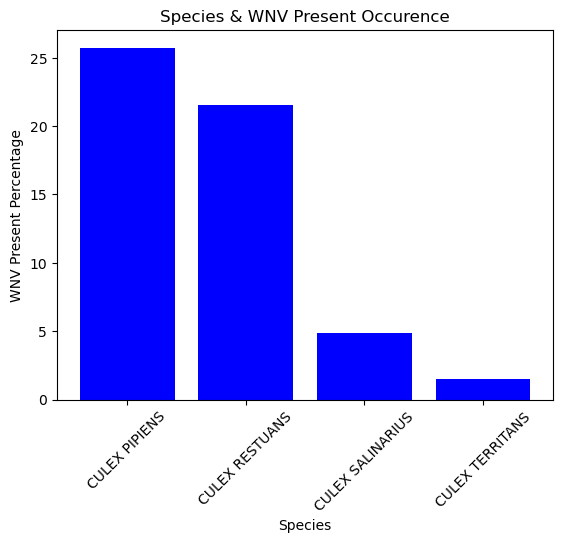

In [553]:
plt.figure()
plt.bar(species_occurance.index.values, species_occurance['mean']*100, color=['b','b','b','b'])
plt.xlabel("Species")
plt.ylabel("WNV Present Percentage")
plt.title("Species & WNV Present Occurence")
plt.xticks(rotation = 45)
plt.show()

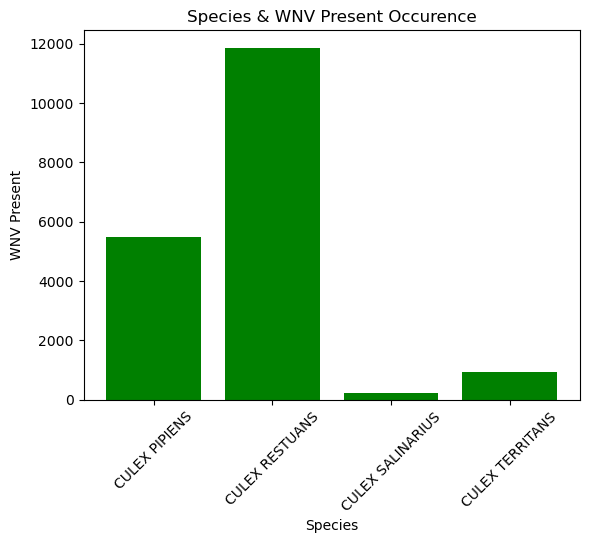

In [554]:
plt.figure()
plt.bar(species_occurance.index.values, species_occurance['count'], color=['g','g','g','g'])
plt.xlabel("Species")
plt.ylabel("WNV Present")
plt.title("Species & WNV Present Occurence")
plt.xticks(rotation = 45)
plt.show()

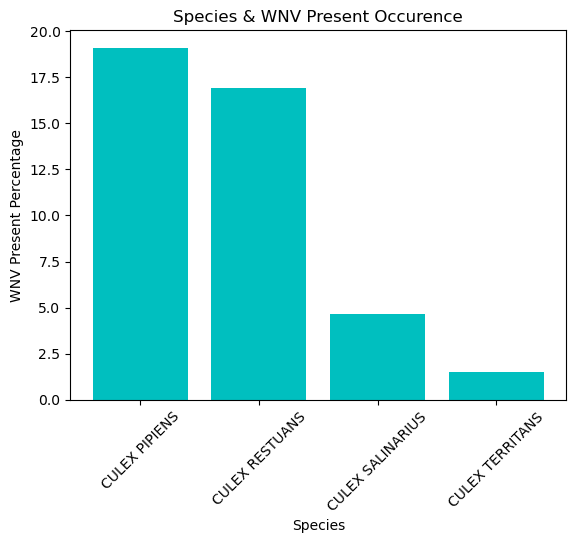

In [555]:
plt.figure()
plt.bar(species_occurance.index.values, species_occurance['var']*100, color=['c','c','c','c'])
plt.xlabel("Species")
plt.ylabel("WNV Present Percentage")
plt.title("Species & WNV Present Occurence")
plt.xticks(rotation = 45)
plt.show()

In [556]:
anova_data = {} # empty dictionary
yikes_mosquitos = mdf['Species'].unique()

for species in yikes_mosquitos: # slice out the prevalence for each species 
    anova_data[species] = mdf.loc[mdf['Species'] == species, 'WNV Present']

In [557]:
stats.f_oneway(anova_data['CULEX PIPIENS'], 
               anova_data['CULEX RESTUANS'], 
               anova_data['CULEX SALINARIUS'],
               anova_data['CULEX TERRITANS'])

F_onewayResult(statistic=105.45270503888439, pvalue=1.082615440825039e-67)

After conducting the ANOVA test we can see that the p-value is very small! Which means that there is statistical difference between the 'Species' and 'WNV' present.' However, to be sure a Tom's Turkey Test will be ran.

In [558]:
from statsmodels.stats import multicomp

multicomp.pairwise_tukeyhsd(mdf['WNV Present'], mdf['Species']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CULEX PIPIENS,CULEX RESTUANS,-0.0419,0.0,-0.059,-0.0248,True
CULEX PIPIENS,CULEX SALINARIUS,-0.2087,0.0,-0.2799,-0.1376,True
CULEX PIPIENS,CULEX TERRITANS,-0.2421,0.0,-0.2795,-0.2047,True
CULEX RESTUANS,CULEX SALINARIUS,-0.1668,0.0,-0.2372,-0.0964,True
CULEX RESTUANS,CULEX TERRITANS,-0.2002,0.0,-0.2362,-0.1643,True
CULEX SALINARIUS,CULEX TERRITANS,-0.0334,0.6881,-0.1113,0.0445,False


**In all cases, the null hypothesis is rejected unless in the case of comparing 'CULEX SALINARIUS' and 'CULEX TERRITANS.'Based on the analysis, there is statistically significant difference.**

Now moving on to analyze which columns are positively correlated with the number of mosquitoes caught and which columns are negatively correlated. After this, determining if these correlations are statistically significant.

In [559]:
# Defining the correlation matrix.
mdf.corr()

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/4126486251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdf.corr()


,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000


In [560]:
# Defining the corelations using 'Mosquito number' specifically.
mdf.corr()['Mosquito number']

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/3241133863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdf.corr()['Mosquito number']


Year               0.129326
Week              -0.033900
Mosquito number    1.000000
WNV Present        0.408034
Lat                0.096820
Lon               -0.151421
Month             -0.040426
Name: Mosquito number, dtype: float64

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/2426488155.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mdf.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')


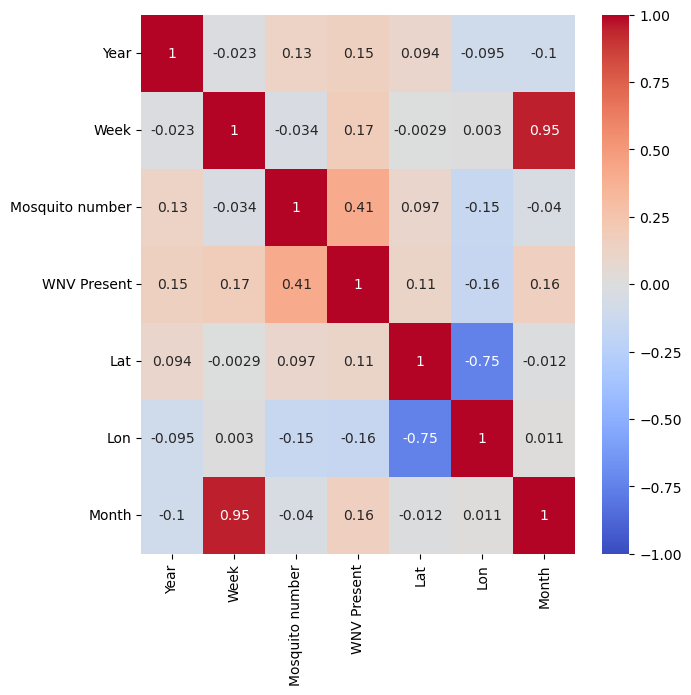

In [561]:
# plotting a visual to see positive and negative correlation with mosquito number.
plt.figure(figsize=(7,7))
sns.heatmap(mdf.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

Based off the following visual, it is observed that when looking at number of mosquitos caught or 'Mosquito number' there are columns with positive and negative correlation. However, there does not seem to be a very STRONG postive correlation displayed on the heatmap. An additional interesting insight is that 'Species' and 'Trap type' were not on the columns. This is likely due to the fact that they are not numeric. Listed below are the colunns with negative and positive correlation: 

**Negative:** Month, Lon, and Week.

**Positive:** WNV Present, Year, and Lat.

The highest correlation is between 'Mosquito number' and 'WNV Present' with a correlation coefficient of **0.41**.

Now moving forward with running a linear regression to determine how the independent variables affect the number of mosquitos caught, and running a logistic regression to determine how the independent variables affect West Nile Virus presence. 

## Advanced Statistical Analysis

### Linear Regression

The goal here is to model the number of mosquitos caught compared to the other columns. So, the dependent variable is 'Mosquito number.' The approach here is to conduct a multiple linear regression since we have many independent variables.

In [562]:
# Getting a view of our columns. 
mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


Separating the dependent and independent variables. Since we have many independent variables, we are going to use the column names to subset the data.

In [563]:
# column arrays
mdf.columns

Index(['Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', 'Month'],
      dtype='object')

In [564]:
X = mdf[mdf.columns[:-6]]
y = mdf['Mosquito number']

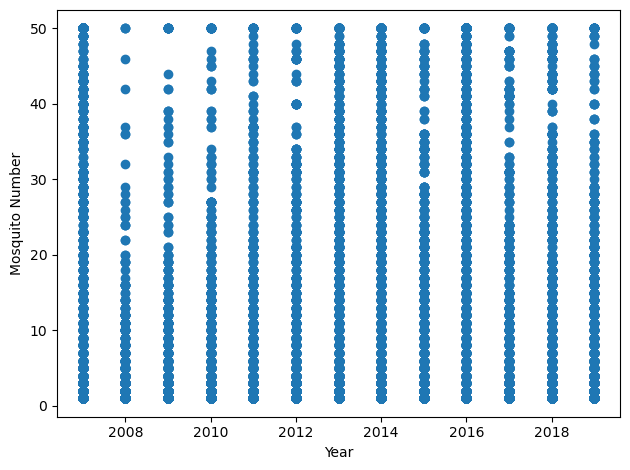

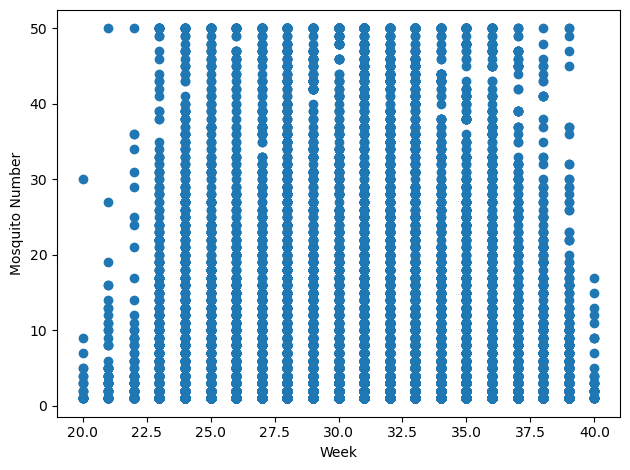

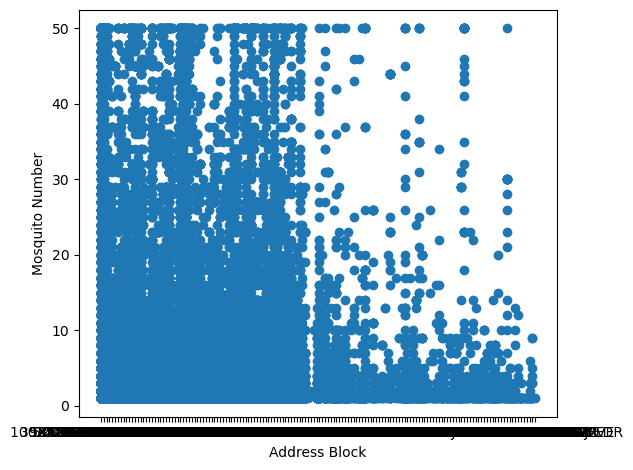

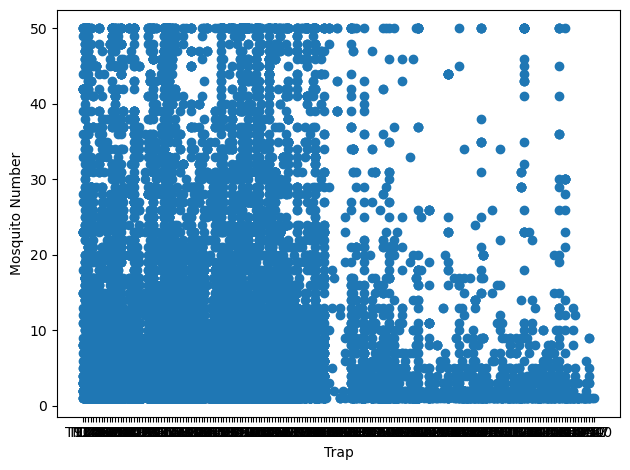

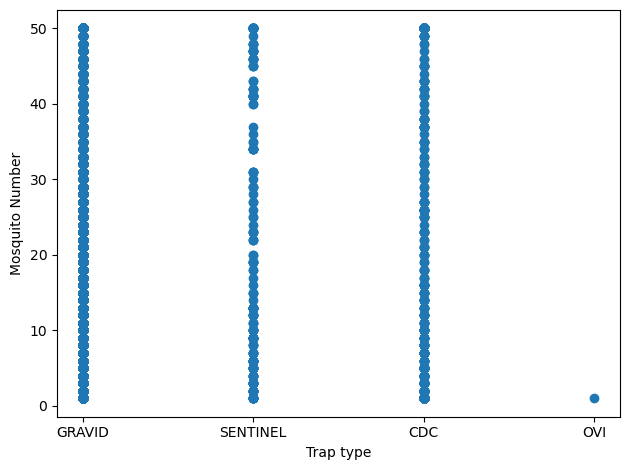

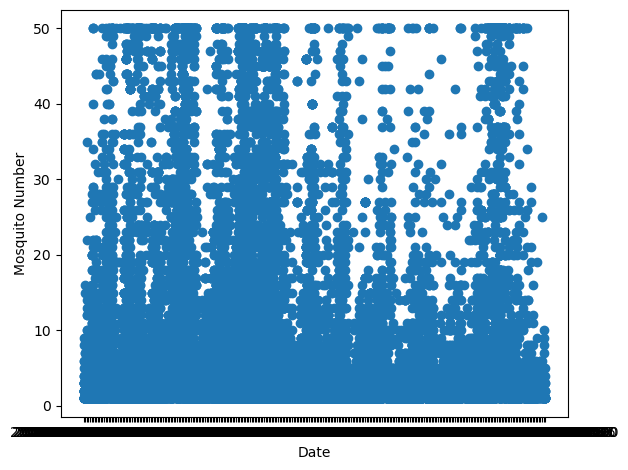

In [565]:
for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito Number')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show();

After plotting the colunns, there does not seem to be a linear relationship present in the plots. As a result, a linear model cannot be fitted here. Moving forward with the logistic regression. 

### Logistic Regression

As with linear regression, the first thing we need to do is separate the data into dependent and independent variables. The logistic will be used with multiple features seeing as though there are many independent variables. 

Before diving in, dropping the 'Mosquito number' column and then taking a look at the correlation between the variables would be best. 

In [566]:
mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


'Species' was converted into a binary column. After the 'Mosquito number' was dropped, 'Species' shows NaN values. Going to fill the 'Species' column with 0. After which a correlation will be ran. 

In [567]:
mdf['Species'] = mdf['Species'].fillna(0)

In [568]:
mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


In [569]:
mdf.corr().style.background_gradient()

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_63025/3826055979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdf.corr().style.background_gradient()


,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000


'Species' still has nan values. Will move forward with using other independent variables. There also seems to be mild linear relation between West Nile Virus presence and Year, Week, Lat, and Month.

In [570]:
# Defining the X and y
X = mdf[['Year','Week', 'Month', 'Lat']] #independent variable
y = mdf['WNV Present'] #dependent variable

X_withconstant = sm.add_constant(X)

In [571]:
# Instantiating the model
mylogreg_mdf = sm.Logit(y,X_withconstant)

# Fitting model
mylogreg_mdf_results = mylogreg_mdf.fit()

# Looking at summary
mylogreg_mdf_results.summary()

Optimization terminated successfully.
         Current function value: 0.487351
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18490
Method:                           MLE   Df Model:                            4
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.06590
Time:                        21:28:00   Log-Likelihood:                -9013.5
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                4.210e-274
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -324.8358     12.627    -25.726      0.000    -349.584    -300.088
Year           0.1115      0.005     20.907      0.000       0.101       0.122
Week           0.0621      0.014      4.370      0.000       0.034       0.090
Month          0.2166      0.062      3.500      0.000       0.095       0.338
Lat            2.2804      0.167     13.642      0.000       1.953       2.608
==============================================================================
"""

Since the p-values are low (lower than 0.05) than it means that the associated variables are relevant in predicting the independent variable, 'West Nile Virus Presence in this case.

Based on the p-values in the summary table above, we can see that Year, Week, Month, and Lat are all is relevant in predicting West Nile Virus Presence. 

Next step, looking at the individual coefficient values to see how they influence West Nile Virus Presence. 

In [572]:
# looking at coefficient values
mylogreg_mdf_results.params

const   -324.835817
Year       0.111482
Week       0.062092
Month      0.216593
Lat        2.280420
dtype: float64

Storing parameters in variables for intepretation. 

In [573]:
beta0 = mylogreg_mdf_results.params[0]

In [574]:
beta1 = mylogreg_mdf_results.params[1]

In [575]:
beta2 = mylogreg_mdf_results.params[2]

In [576]:
beta3 = mylogreg_mdf_results.params[3]

Now, calculating an *odds ratio* by taking the exponential function of the coefficients.


In [577]:
np.exp(beta0)

8.425531046283133e-142

In [578]:
np.exp(beta1)

1.1179331854854884

This means that with one unit increase in 'Week', the odds of a person getting West Nile Virus increases by a factor of 1.12. Week is our independent variable. 


In [579]:
np.exp(beta2)

1.0640598250809556

This means that with one unit increase in 'Month', the odds of a person getting West Nile Virus increases by a factor of 1.06. Month is our independent variable. 


In [580]:
np.exp(beta3)

1.2418388437993129

This means that with one unit increase in 'Lat', the odds of a person getting West Nile Virus increases by a factor of 1.24. Lat is our independent variable. 


Overall, since our coefficients are positive, then the variable makes it more likely for West Nile Virus Presence. 

In [581]:
# getting probabiistic and binary predictions for the model for evaluation
model_predictions_prob = mylogreg_mdf_results.predict(X_withconstant)
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)

In [582]:
# How many were predicted right 
(model_predictions_binary == mdf['WNV Present']).sum()

14348

In [583]:
# Number of Data Points
len(mdf['WNV Present'])

18495

In [584]:
print("The WNV Presence accuracy is:", (14348/18495)*100 , "%")

The WNV Presence accuracy is: 77.57772370911057 %


Although, the accuracy is 77.5 %, the limitstions of this model assumes linearity between the predicted (dependent) variable and the predictor (independent) variables. It also fails to predict a continuous outcome.

### Conclusion

When looking at the average number of mosquitoes for each month the following trends arise:

For **total number of mosquitos per month**, May(5) averaged 7, June(6) averaged 464.5, July(7) averaged 851.3, August(8) averaged 1145.3, September(9) averaged 576.8, and October(10) averaged 37.5. The following was noticed: 

- Summer months by far has the highest average number of mosquitos especially in July and August.
- Both the beginning (May) and ending month (October) has the lowest average number of mosquitos. 
- It can be inferred that the watmer the weather the higher the average number of mosquitos. 
- 25th percentile is July.
- 50th and 75 percentile is July.

For **number of mosquitos(Mosquito number)**, May(5) averaged 2.76, June(6) averaged 10.3, July(7) averaged 11.6, August(8) averaged 12.1, September(9) averaged 8.4, and October(10) averaged 5.4. The following was noticed: 

- Summary months have the highest average per mosquitos caught. July and August have the highest.
- Both the beginning (May) and ending month (October) has the lowest average number of mosquitos caught.
- It can be inferred that the warmer the weather the higher the average number of mosquitos caught.

There is a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus. In all cases, the null hypothesis is rejected unless in the case of comparing 'CULEX SALINARIUS' and 'CULEX TERRITANS.'Based on the analysis, there is statistically significant difference.

When looking at correlation with the number of mosquitoes caught:

**Negative columns:** Month, Lon, and Week.

**Positive columns:** WNV Present, Year, and Lat.

The highest correlation is between 'Mosquito number' and 'WNV Present' with a correlation coefficient of **0.41**.

When conducting a linear regression to test the dependent variable, 'Mosquito number', after analyzing and plotting, there did not seem to be a linear relationship present. As a result, a linear model could not be fitted here. 

When conducting a logistic regression of the dependent variable 'WNV Present', there was relation between this and the independent variables of 'Year', 'Week, 'Month', and 'Lat.' Although, the accuracy is 77.5 %, the limitations of this model assumes linearity between the predicted (dependent) variable and the predictor (independent) variables. It also fails to predict a continuous outcome.